# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | fort-shevchenko
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | raahe
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | raja
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | cabedelo
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.98,80,31,1.70,PN,1707254196
1,yellowknife,62.4560,-114.3525,-17.47,83,100,5.66,CA,1707254194
2,blackmans bay,-43.0167,147.3167,14.07,74,97,2.61,AU,1707254396
3,puerto natales,-51.7236,-72.4875,17.25,45,100,5.14,CL,1707254199
4,port-aux-francais,-49.3500,70.2167,6.05,90,100,11.14,TF,1707254191


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.98,80,31,1.70,PN,1707254196
1,yellowknife,62.4560,-114.3525,-17.47,83,100,5.66,CA,1707254194
2,blackmans bay,-43.0167,147.3167,14.07,74,97,2.61,AU,1707254396
3,puerto natales,-51.7236,-72.4875,17.25,45,100,5.14,CL,1707254199
4,port-aux-francais,-49.3500,70.2167,6.05,90,100,11.14,TF,1707254191


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

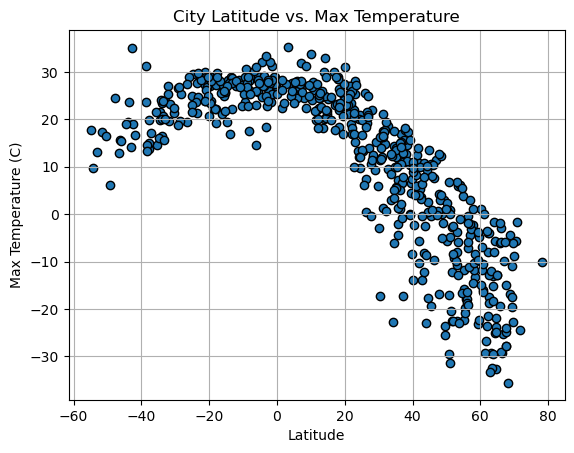

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

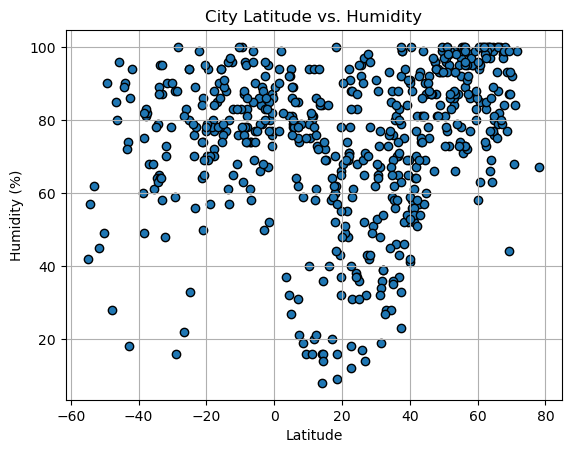

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

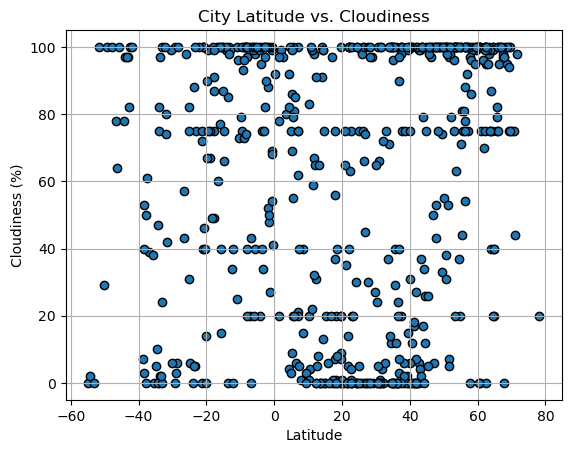

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

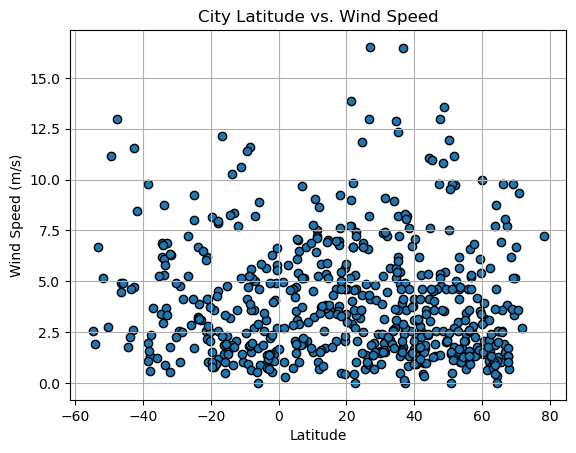

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_column, y_column, x_pos, y_pos, title, xlabel, ylabel):
    # Extract x and y values from the DataFrame
    x = df[x_column]
    y = df[y_column]
    
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate the regression values
    reg_values = x * slope + intercept
    
    # Create the plot
    plt.scatter(x, y)  # Plot the data points
    plt.plot(x, reg_values, color='red')  # Plot the regression line
    
    # Annotate the plot with the linear equation
    # x_pos and y_pos paramters put there to decide where to plave the linear equation on graph
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(x_pos, y_pos), xycoords='axes fraction', color='red')
    
    # Adding title and labels
    print(f'The r-value is: {r_value}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show grid and plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-17.47,83,100,5.66,CA,1707254194
7,albany,42.6001,-73.9662,3.52,57,6,0.45,US,1707254765
8,fort-shevchenko,44.5086,50.2630,2.47,69,26,11.07,KZ,1707254765
10,raahe,64.6833,24.4833,-21.95,100,100,1.25,FI,1707254765
11,ilulissat,69.2167,-51.1000,-10.99,44,75,9.77,GL,1707254765


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.98,80,31,1.70,PN,1707254196
2,blackmans bay,-43.0167,147.3167,14.07,74,97,2.61,AU,1707254396
3,puerto natales,-51.7236,-72.4875,17.25,45,100,5.14,CL,1707254199
4,port-aux-francais,-49.3500,70.2167,6.05,90,100,11.14,TF,1707254191
5,mount gambier,-37.8333,140.7667,13.72,81,50,0.57,AU,1707254165


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8707845347362807


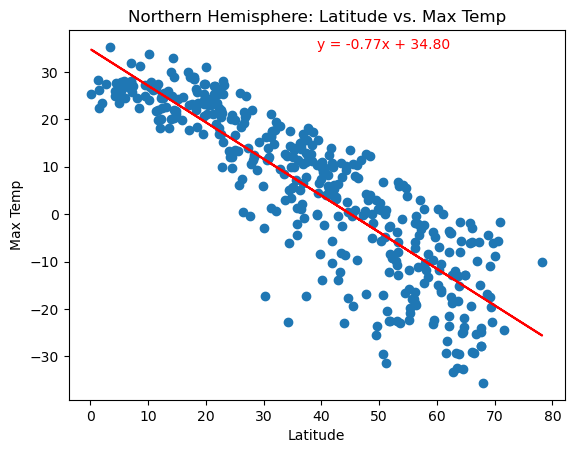

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp', 0.50, 0.95, "Northern Hemisphere: Latitude vs. Max Temp", "Latitude", "Max Temp")

The r-value is: 0.6317852642201003


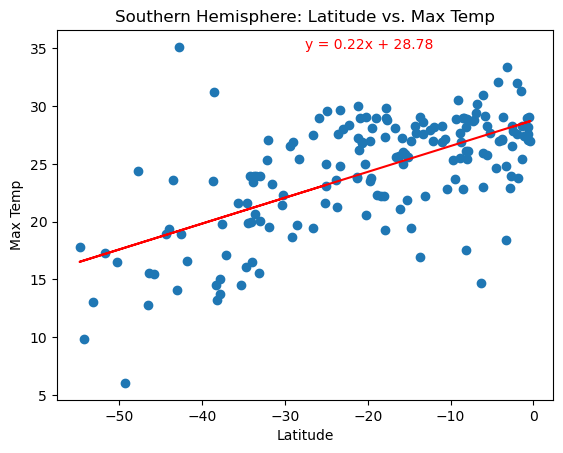

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp', 0.50, 0.95, "Southern Hemisphere: Latitude vs. Max Temp", "Latitude", "Max Temp")

**Discussion about the linear relationship:** 

Northern Hemisphere: The r value is close to −1, which is a strong negative correlation between latitude and maximum temperature. This means that as the latitude increases the maximum temperature tends to decrease. This make sense as because locations closer to the north pole tend to be colder than places closer to the equator. 

Southern Hemisphere: The r value is has a moderate positive correlation between latitude and maximum temperature in the Southern Hemisphere. This means that as the latitude increases the maximum temperature tends to increase as well. This make sense as because locations closer to the south pole tend to be colder than places closer to the equator. Even though there is a positive correlation indicating that latitude can be used to predict maximum temperatures in the Southern Hemisphere, the correlation is not strong. This suggests that the correlation is not strong and it would imply other factors not accounted for in this simple linear model likely play significant roles in determining maximum temperatures. Fun facts might have an explnation on why this is.

Fun facts: 68% of the Earth's landmass is in the Northern Hemisphere, including 90% of the population also lives in the Northern Hemisphere. These facts could be an explanation on why we don't see the inverse of the Latitude vs. Max Temp data when looking at the Northern and Southern Hemisphere's respectivley. So since the Northern Hemisphere has more cities than the Southern hemisphere this could imply we don't have enough data from the southern Hemisphere to show the same correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.42908044143187063


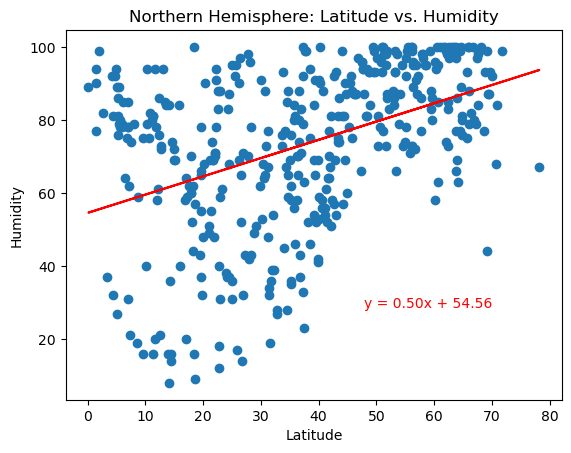

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity', 0.60, 0.25, "Northern Hemisphere: Latitude vs. Humidity", "Latitude", "Humidity")

The r-value is: 0.27004797765787636


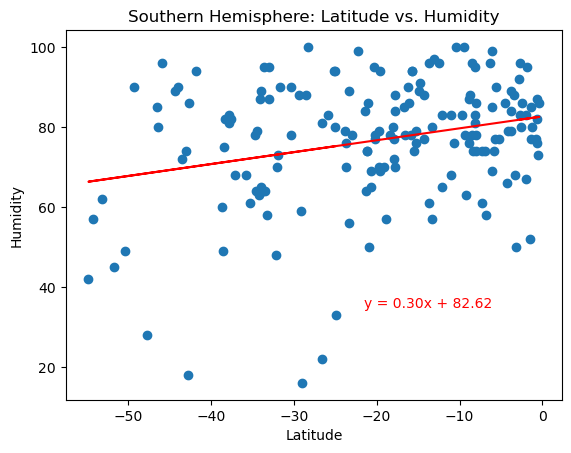

In [25]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity', 0.60, 0.25, "Southern Hemisphere: Latitude vs. Humidity", "Latitude", "Humidity")

**Discussion about the linear relationship:** 

Northern hemisphere: There is a moderate positive correlation between latitude and humidity in the Northern Hemisphere. This suggests that as the latitude increases, there is a tendency for humidity to increase as well. The correlation is moderate, implying that while there is a relationship, other factors also play a role in determining humidity levels.

Southern hemisphere: There is a moderate positive correlation between latitude and humidity in the Southern Hemisphere. This suggests that as the latitude increases, there is a tendency for humidity to increase as well. The correlation is moderate, implying that while latitude is a factor, it's not the only determinant of humidity levels.

Fun fact: Humidity is more so determined by warm bodies of water and the rate that they evaporate due to heat and water vapor in the air! https://www.pbs.org/newshour/science/8-things-didnt-know-humidity#:~:text=Humidity%20comes%20from%20water%20evaporating,%2C%20in%20Dhahran%2C%20Saudi%20Arabia.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34642462111895667


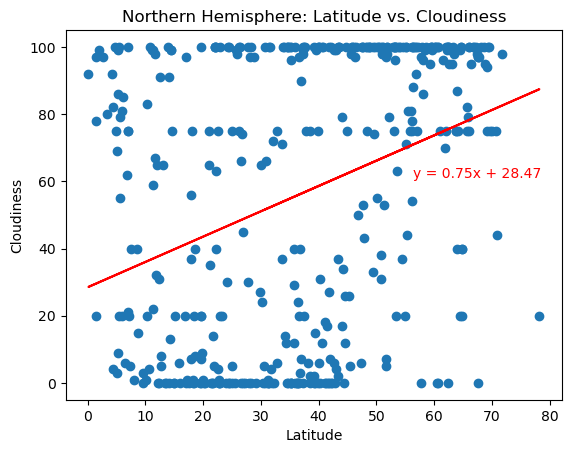

In [32]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness', 0.70, 0.60, "Northern Hemisphere: Latitude vs. Cloudiness", "Latitude", "Cloudiness")

The r-value is: 0.2501965005900541


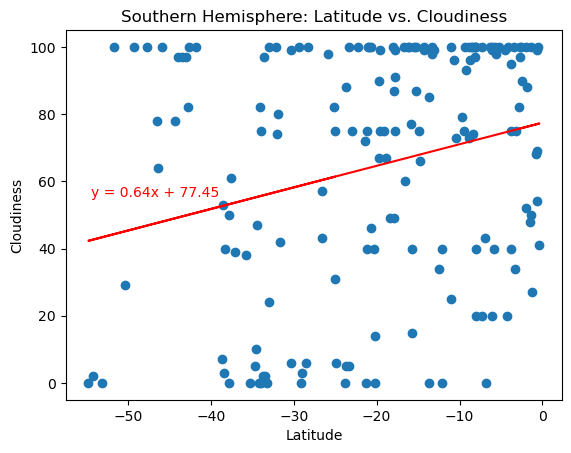

In [38]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness', 0.05, 0.55, "Southern Hemisphere: Latitude vs. Cloudiness", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 

Northern Hemisphere: There is a weak positive correlation between latitude and cloudiness in the Northern Hemisphere. This suggests that as the latitude increases, there is a slight tendency for cloudiness to increase as well. However, the correlation is weak, implying that latitude alone does not strongly predict cloudiness levels.

Southern Hemisphere: There is a weak positive correlation between latitude and cloudiness in the Southern Hemisphere. This suggests that as latitude increases, there is a slight tendency for cloudiness to increase. However, the correlation is relatively weak, suggesting that other factors also significantly influence cloudiness.

Fun facts: Check out NASA's explanation on why clouds form the way they do around the globe! https://climate.nasa.gov/news/2440/expanding-tropics-are-pushing-high-altitude-clouds-towards-poles/

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11158610589808933


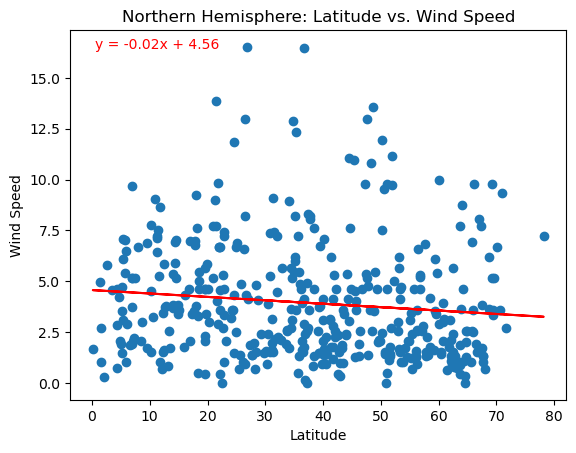

In [39]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed', 0.05, 0.95,"Northern Hemisphere: Latitude vs. Wind Speed", "Latitude", "Wind Speed")

The r-value is: -0.17602828444715266


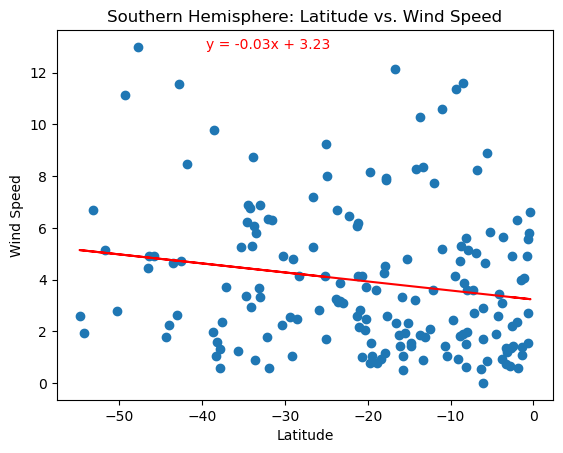

In [40]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed', 0.30, 0.95, "Southern Hemisphere: Latitude vs. Wind Speed", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** 

Northern Hemisphere: There is a weak negative correlation between latitude and wind speed in the Northern Hemisphere. This suggests that as the latitude increases, there is a slight tendency for wind speed to decrease. The correlation is weak so this implies latitude alone is not a significant predictor of wind speed. Since it so weak it's a strong indication that other factors are playing a role in wind speed.

Southern Hemisphere: There is a weak negative correlation between latitude and wind speed in the Southern Hemisphere. This suggests that as the latitude increases, there is a slight tendency for wind speed to decrease. The correlation is weak so this implies latitude alone is not a significant predictor of wind speed. Since it so weak it's a strong indication that other factors are playing a role in wind speed.